# Stock Market Prediction Model
This is a model that takes data on past market crashes and predicts models based from it.


In [48]:
import pandas as pd
import seaborn as sns
import tensorflow as tf


In [49]:
df = pd.read_csv('Stock-Market-Model/FinancialMarketData.xlsx - EWS.csv')

In [47]:
df.head()#pritns the first five rows so you can see the columns and their values

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
df.describe()#look over the data; can see the different mins and maxes for each column

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


## Data Cleaning
Checkign for missing values or any errors in the data

In [ ]:
df.isnull().sum() # to check for missing data
#No missing data, so we can proceed

Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64

## Data Visualization
Histogram plots

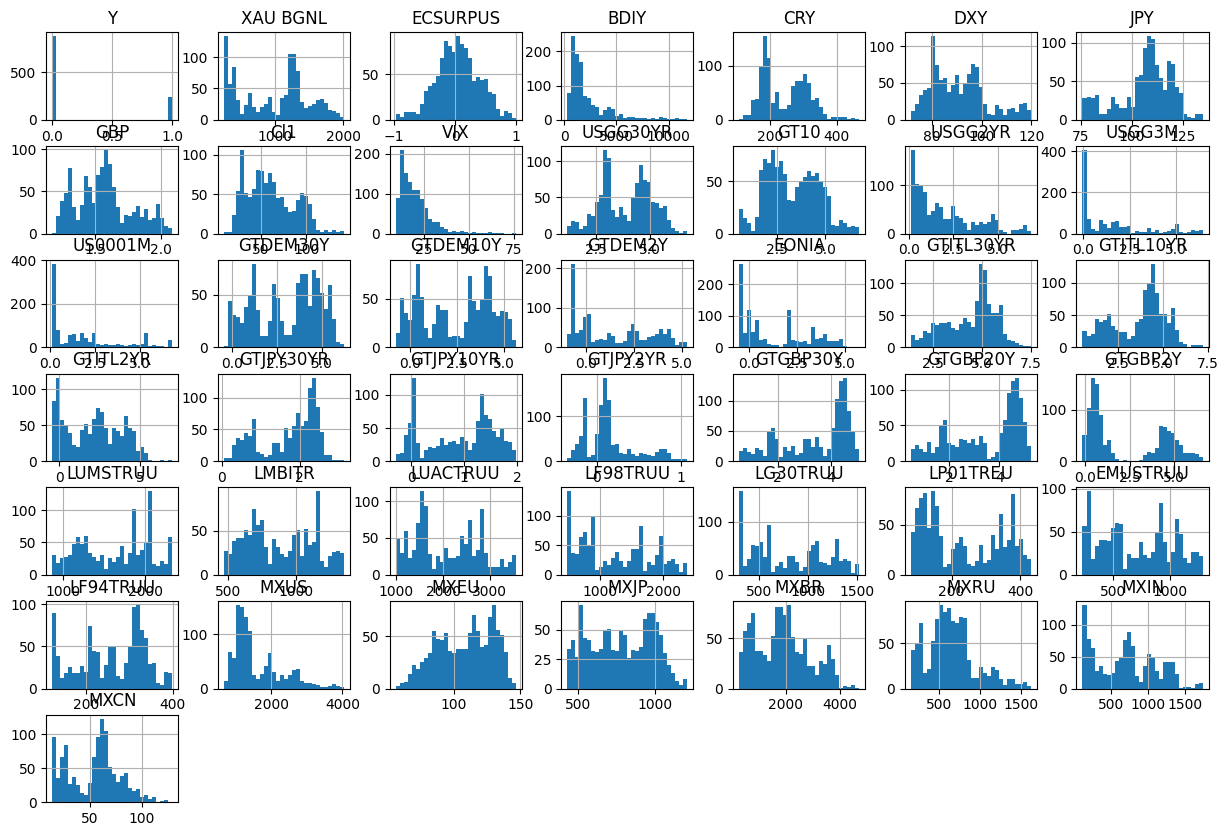

In [51]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15,10))
plt.show()#visulaize the plots for each feature and see how evenly or uneven they are distributed i.e skewed ones are VIX, US001M

In [52]:
df.columns#to identify our features

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')

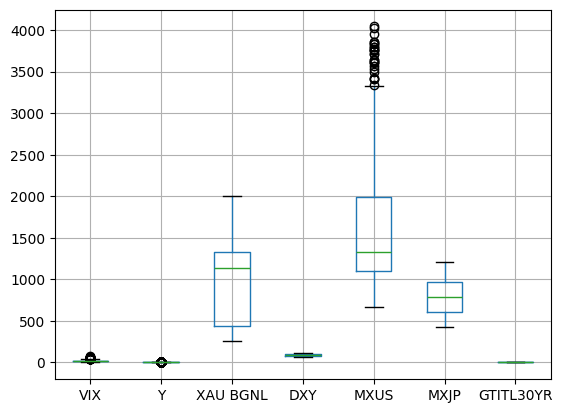

In [53]:
#plt.figure(figsize=(15,10))#specifies size of the box_plot and outliers in the data
specifics =['VIX', 'Y', 'XAU BGNL', 'DXY', 'MXUS', 'MXJP', 'GTITL30YR']
selected_data = df[specifics]

selected_data.boxplot()
plt.show()


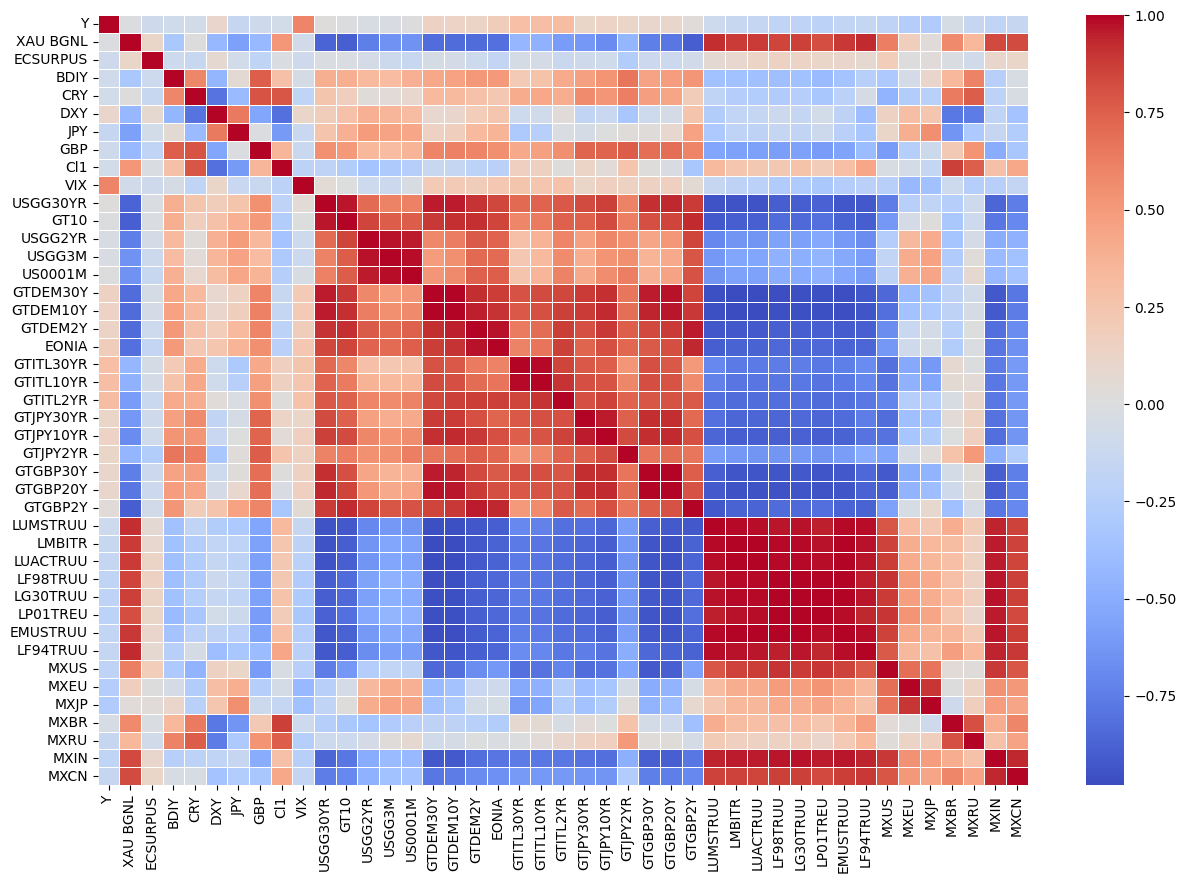

In [54]:
#Correlation and heatmap analysis
numeric_set = df.select_dtypes(include=[float, int])

corr_matrix = numeric_set.corr()

plt.figure(figsize=(15,10))#define figure sizes
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.show()

We can see potential relations like: VIX, GTITL30YR, GTITL10YR, GTITL2YR

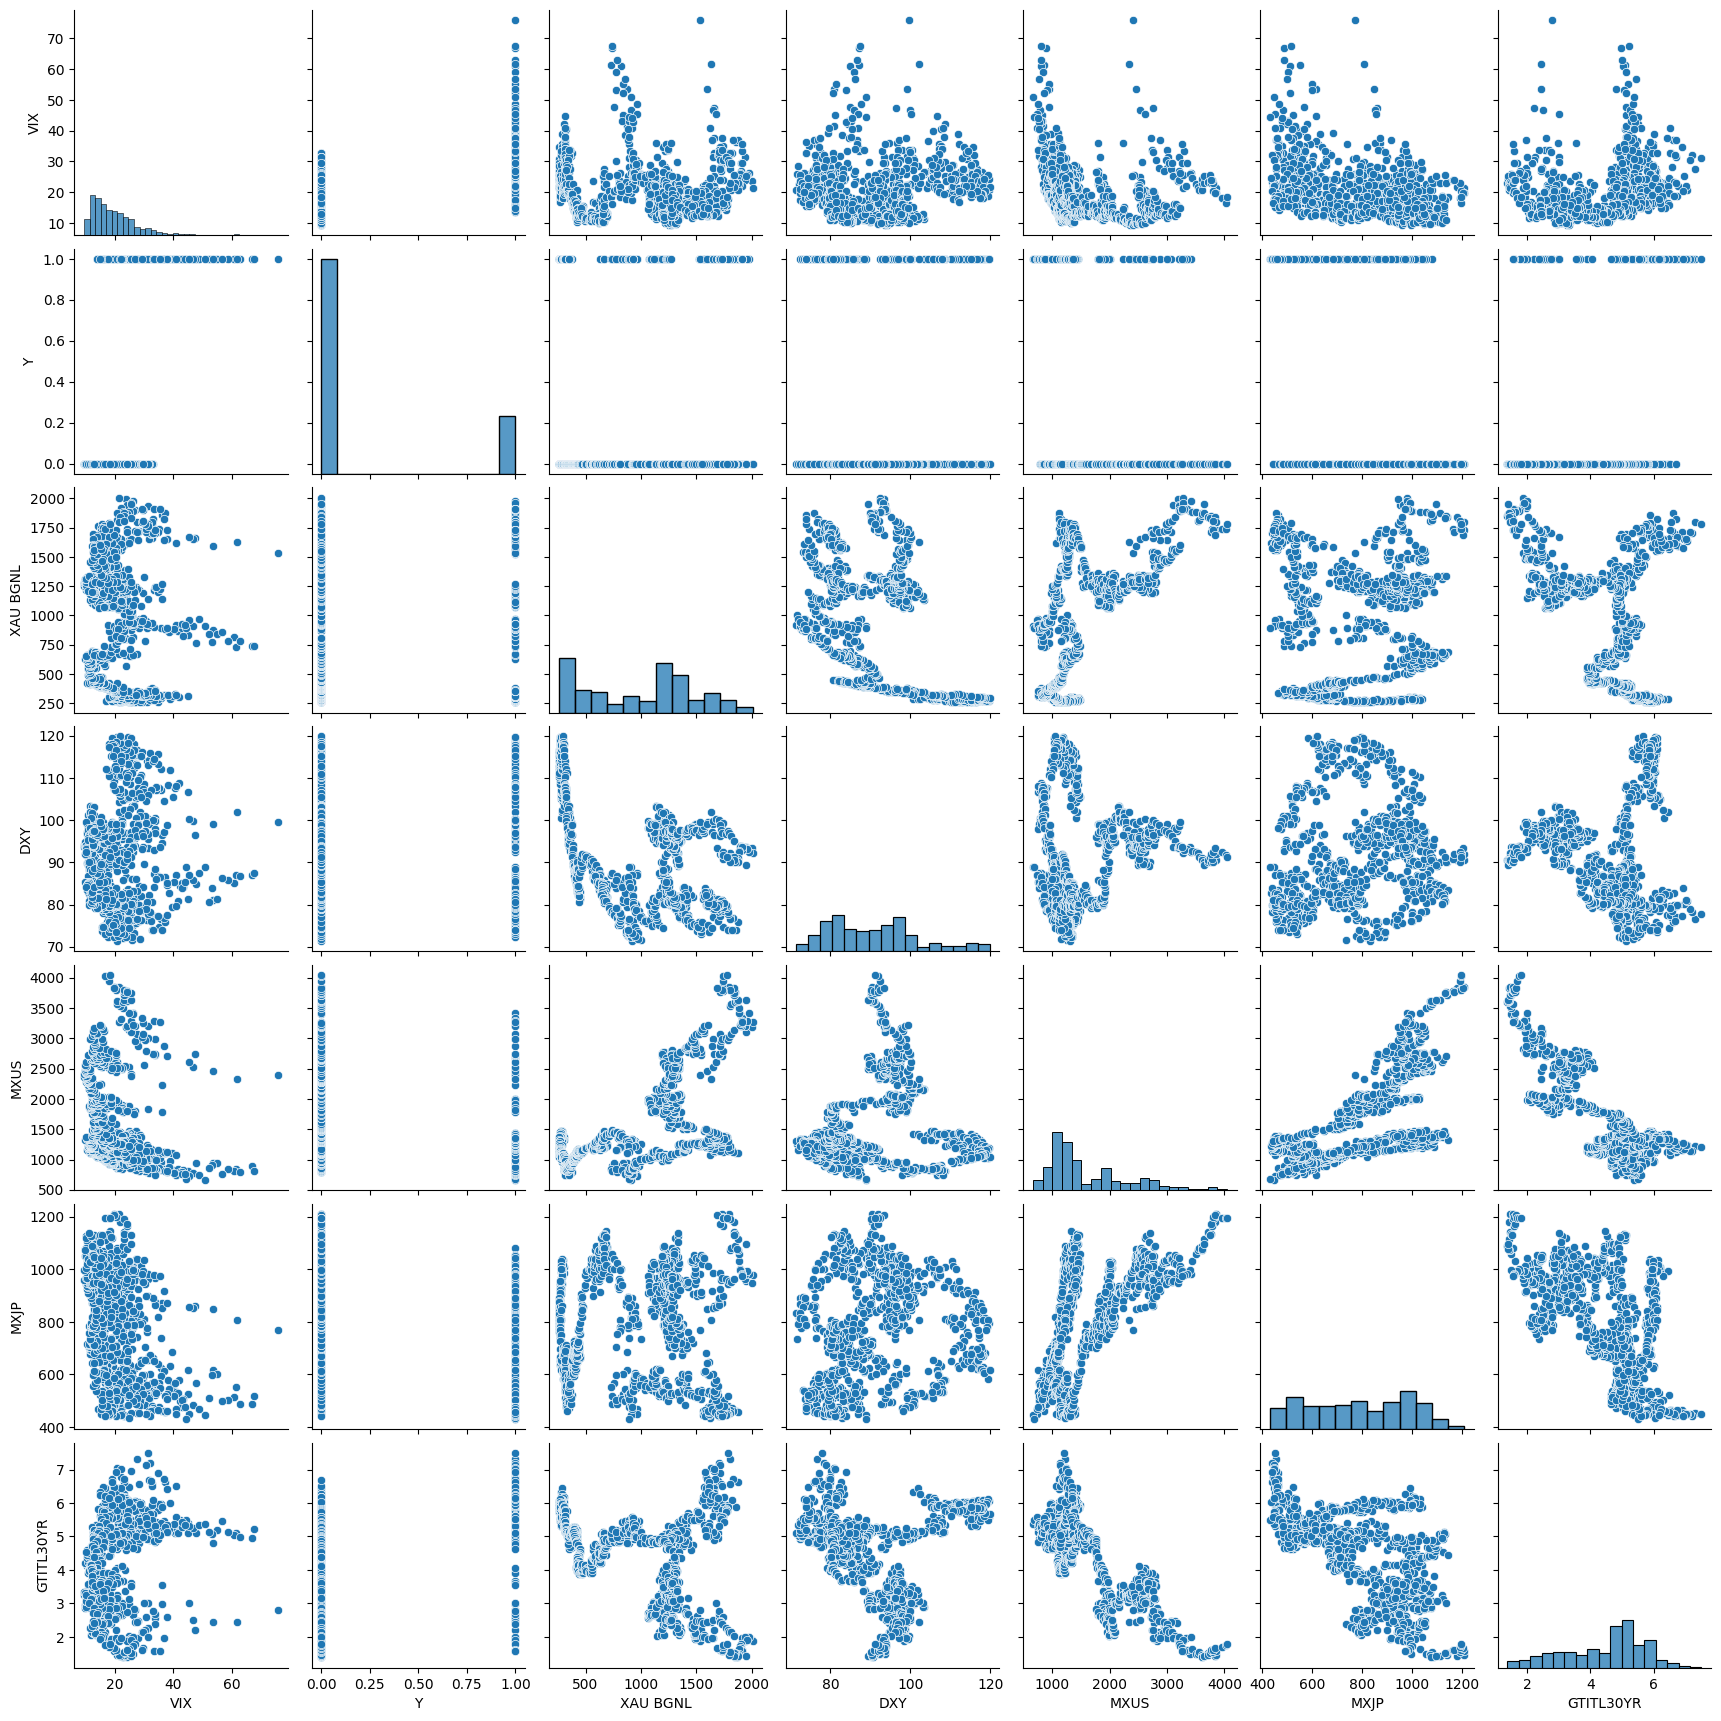

In [55]:
#A scatter Matrix plotting features along with target
# Select relevant features along with the target

selected_features = specifics

# Create pair plot
sns.pairplot(df[selected_features], diag_kind='hist')
plt.show()

## Data Splitting and Training

In [56]:
from sklearn.model_selection import train_test_split
X_data = df[['VIX']]
Y_data = df['Y']

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
#so the x_train and y_train are 80% of the data and x_test and y_test are 20% of the data

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (888, 1)
Testing set size: (223, 1)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

#Logistic Regession
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

#Predict
y_pred = model.predict(X_test)

#Classification Report
print('Classification Report')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(classification_report(y_test, y_pred))


Classification Report
Mean Squared Error: 0.15246636771300448
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223



In [60]:
#compare against deep neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_N = Sequential()#type of neural network model
model_N.add(Dense(64, input_dim=X_train.shape[1],activation="relu"))
#input_dim is the number of features in the data
#activation function is relu
#64 is the number of neurons in the layer
model_N.add(Dense(32, activation="relu"))
model_N.add(Dense(1, activation="linear"))
model_N.compile(optimizer="Adam", loss="mean_squared_error")
model_N.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)
#epochs is the number of times the model will go through the data
#batch_size is the number of samples that will be used in each iteration
#validation_split is the percentage of the data that will be used for validation
y_pred_N = model_N.predict(X_test)



#Classification Report
print('Classification Report')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(classification_report(y_test, y_pred))



Epoch 1/100


/Users/mercy/Desktop/HeadStarter/Stock-Market-Model/stock-market/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4580  
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1398
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1409
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1264
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1295
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1418
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1152
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1226
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1358
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1186
Epoch 12/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171
Epoch 13/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1214
Epoch 14/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1325
Epoch 15/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [ ]:

#From what we can see our model,  the logistic regression and deep neural network has similar metrics. Showing our LogisticRegession is better.
